# Notebook setup

In [1]:
from IPython.display import clear_output

Uncomment and run the cell below if you are in a Google Colab environment. It will:
1. Mount google drive. You will be asked to authenticate and give permissions.
2. Change directory to google drive.
3. Make a directory "hamilton-tutorials"
4. Change directory to it.
5. Clone this repository to your google drive
6. Move your current directory to the hello_world example
7. Install requirements.

This means that any modifications will be saved, and you won't lose them if you close your browser.

In [2]:
## 1. Mount google drive
# from google.colab import drive
# drive.mount('/content/drive')
## 2. Change directory to google drive.
# %cd /content/drive/MyDrive
## 3. Make a directory "hamilton-tutorials"
# !mkdir hamilton-tutorials
## 4. Change directory to it.
# %cd hamilton-tutorials
## 5. Clone this repository to your google drive
# !git clone https://github.com/DAGWorks-Inc/hamilton-tutorials/
## 6. Move your current directory to the hello_world example
# %cd hamilton-tutorials/hello_world
## 7. Install requirements.
# %pip install -r requirements.txt
# clear_output()  # optionally clear outputs
# To check your current working directory you can type `!pwd` in a cell and run it.

# Imports

In [4]:
import numpy as np
import pandas as pd
from hamilton import driver
from IPython.display import display

# import the Python modules containing your code logic
# it will be used to create the DAG
import functions
import functions2

In [5]:
# We use the iPython autoreload extension which reloads the specified module whenever a
# code cell is executed. This allows us to write clean code in our Python module
# and execute it in this notebook for quick iteration

# import the jupyter extension
%load_ext autoreload
# set it to only reload the specified modules
%autoreload 1
# specify the Python modules to reload
%aimport functions, functions2
# for more info: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

# Hamilton Driver

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


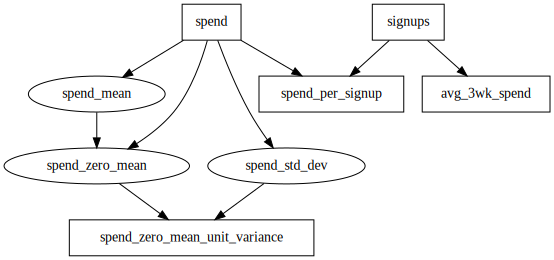

,spend,signups,avg_3wk_spend,spend_per_signup,spend_zero_mean_unit_variance
0,10,1,NaN,10.0,-1.064405
1,10,10,NaN,1.0,-1.064405
2,20,50,20.333333,0.4,-0.483821
3,40,100,53.333333,0.4,0.677349
4,40,200,116.666667,0.2,0.677349


In [6]:
# Instantiate the Hamilton driver with the Python modules.
# We want to execute this cell whenever we make changes to the Python module
# to reload them in our Driver

initial_config = {}
dr = driver.Driver(
    initial_config,  # first argument is the config dict
    functions,  # following arguments are Python modules
    functions2,
)

# the name of the Python functions / DAG nodes we want to retrieve the result of
requested_outputs = [
    "spend",
    "signups",
    "avg_3wk_spend",
    "spend_per_signup",
    "spend_zero_mean_unit_variance",
]

# the inputs we want to pass to the DAG
inputs = {}

# let's create the dataframe!
results = dr.execute(requested_outputs, inputs=inputs)

# `display()` is the ipython magic to display cell outputs of various formats (text, dataframe, HTML, etc.)
display(
    dr.visualize_execution(requested_outputs, None, inputs),  # display the execution path
    results.head()  # the output DataFrame from the Driver
)

# Visualization

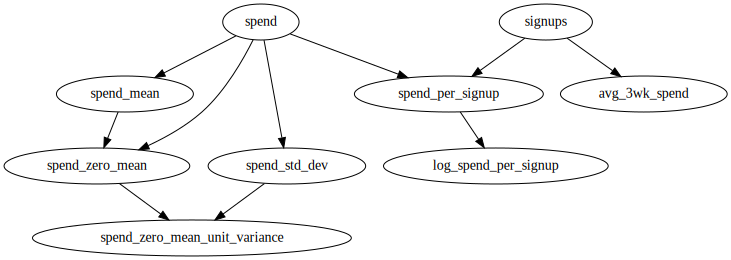

In [7]:
# display the entire DAG from the Driver. It includes all modules passed
dr.display_all_functions(None)  # pass None to not save the image

# uncomment the code below to save the file; render kwargs follows the API for graphviz.Digraph
# ref: https://graphviz.readthedocs.io/en/stable/api.html#digraph
# dr.display_all_functions("all_functions", render_kwargs={"format": "png", "view": False})

In [8]:
# display the DAG execution path for the given requested_outputs and inputs provided
dr.visualize_execution(requested_outputs, None, inputs),  # pass None to not save the image

# uncomment below to save to file
# dr.visualize_execution(requested_outputs, "all_functions", {"format": "png", "view": False}, inputs)

(<graphviz.graphs.Digraph at 0x7fb447fc3250>,)

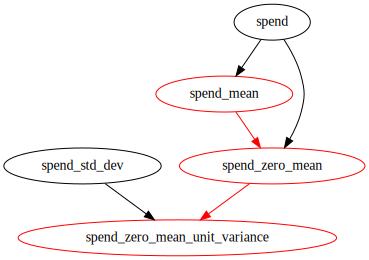

In [9]:
# visualize the path of execution between two functions
dr.visualize_path_between(
    "spend_mean", "spend_zero_mean_unit_variance", 
    None, # we pass None to not save the image to file.
    strict_path_visualization=False
)